In [ ]:
#Polytrope EOS

In [ ]:
def dmdr(r, m):
    return 4*pi*(r**2)*epsilon(r,p)



In [ ]:
def mrk4(r, m, h):

  for i in range(1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dmdr(r, m)
        k2 = h * dmdr(r + 0.5 * h, m + 0.5 * k1)
        k3 = h * dmdr(r + 0.5 * h, m + 0.5 * k2)
        k4 = h * dmdr(r + h, m + k3)

        # Update next value of y
        mnew = m + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        # to print
       # print(r,m,h,rnew,mnew)

        # for next step
        r=rnew
        m=mnew

  return mnew

In [ ]:
def epsilon(r,p):

  if(r==10):
    epsilon=epsilon_c

  else:
    epsilon=(p/k)**(1.00/gamma)

  return epsilon


In [ ]:
def dpdr(r, p):
  term1= -((G*m)/(r**2))
  term2= epsilon(r,p)
  term3= 1+(p/(epsilon(r,p)*(c**2)))
  term4= 1+(((4*pi*(r**3)*p))/(m*(c**2)))
  term5= 1-((2*G*m)/(r*(c**2)))
  return (term1*term2*term3*term4)/term5


In [ ]:


def rk4(r0, p0, h):
    r=r0
    global p
    p=p0

    global m

    for i in range (1, number):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dpdr(r, p)
        k2 = h * dpdr(r + 0.5 * h, p + 0.5 * k1)
        k3 = h * dpdr(r + 0.5 * h, p + 0.5 * k2)
        k4 = h * dpdr(r + h, p + k3)

        # Update next value of y
        pnew = p + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        rnew = r + h

        r=rnew
        p=pnew

        epsilon_new=(pnew/k)**(1.0/gamma)

        mnew=mrk4(r,m,h)

        m=mnew

        if isinstance(pnew, complex):
          f=open('output.txt','a')
          print(epsilon_c, rlast, mlast)
          f.write("{} {} {} \n".format(epsilon_c, rlast, mlast))
          f.close()

          break




        # to print


        rlast=rnew
        mlast=mnew




    return pnew


In [ ]:
for j in range (1, 100):
    epsilon_c= (1+j)*(10**14)

    r0=10
    pi=3.14
    h=10
    k= 5.38*(10**9)
    gamma= 1.667
    G= 6.67430*(10**(-8))
    c= 2.99792458*10**10
    m0= (4/3)*pi*(r0**3)
    m=m0
    p0= k*(epsilon_c)**gamma
    number=2000000
    rk4(r0,p0,h)

200000000000000 1837410 8.613796168255007e+32
300000000000000 1694810 1.0112138819263783e+33
400000000000000 1597060 1.1252983445022506e+33
500000000000000 1523050 1.2169735036133998e+33
600000000000000 1463700 1.2930802577136933e+33
700000000000000 1414280 1.357669859939326e+33
800000000000000 1372030 1.4133680981409856e+33
900000000000000 1335190 1.4619862696995387e+33
1000000000000000 1302570 1.50483232338585e+33
1100000000000000 1273340 1.542884464124346e+33
1200000000000000 1246900 1.5768949014023456e+33
1300000000000000 1222770 1.607455267595673e+33
1400000000000000 1200600 1.635039686190974e+33
1500000000000000 1180120 1.6600341502763804e+33
1600000000000000 1161090 1.6827571675596497e+33
1700000000000000 1143340 1.703474639625015e+33
1800000000000000 1126720 1.7224108216256054e+33
1900000000000000 1111100 1.739756549306783e+33
2000000000000000 1096370 1.755675518313443e+33
2100000000000000 1082440 1.7703091479929935e+33
2200000000000000 1069240 1.7837803985928352e+33
2300000000

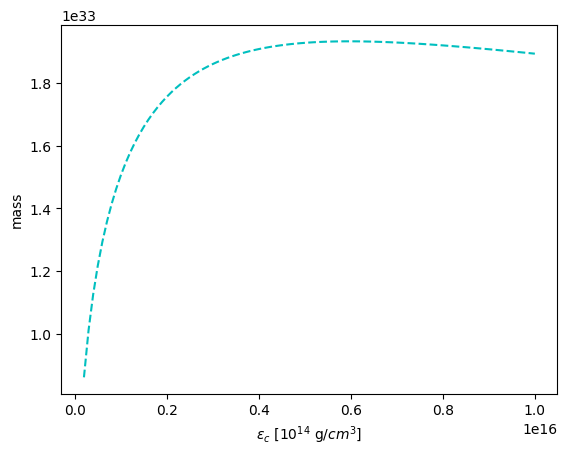

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 0]
y = data[:, 2]
plt.xlabel('$\epsilon_{c}$ [$10^{14}$ g/$cm^{3}$]')
plt.ylabel('mass')     # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'c--')
plt.show()

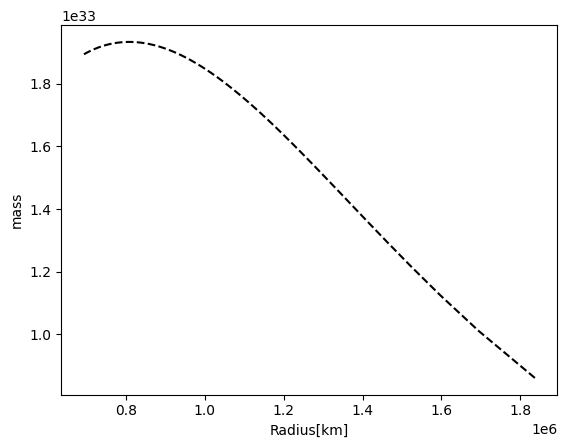

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('output.txt')


x = data[:, 1]
y = data[:, 2]
plt.xlabel('Radius[km]')
plt.ylabel('mass')         # 1 solar mass = 2*10^33 grams
plt.plot(x, y,'k--')
plt.show()